## packages

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

import json
from pandas.io.json import json_normalize
from datetime import datetime
import os


## reading and organizing data

In [72]:
#rootDir = '../messages/inbox' # download all facebook message data into the same folder as code
rootDir ='/home/luke/Downloads/facebook/messages/inbox'
yourName = 'Luke Russell'

dataDict = {}
dfPeople = pd.DataFrame(columns=['content','sender_name','share.link','timestamp_ms','type','person','direction','date','day'])

for dirName, subdirList, fileList in os.walk(rootDir):

    try:
        with open("{}/message_1.json".format(dirName)) as file:
            jsonLoad = json.load(file)
        dfPerson = json_normalize(jsonLoad['messages'])
        members = dfPerson['sender_name'].unique()
        for i in range(0,len(members)):
            if members[i] != yourName:
                person = members[i]
        firstName, *middleName, lastName = person.split()

        dfPerson['person'] = firstName + ' ' + lastName

        dfPerson['direction'] = np.nan
        dfPerson.loc[dfPerson['sender_name'].str.contains(yourName), 'direction'] = 'sent'
        dfPerson.loc[~dfPerson['sender_name'].str.contains(yourName), 'direction'] = 'received'


        dfPerson['date'] = dfPerson['timestamp_ms']/1000
        dfPerson['date'] = dfPerson['date'].astype(int)
        dfPerson['date'] = pd.to_datetime(dfPerson['date'], unit='s')
        dfPerson['day'] = dfPerson['date'].dt.to_period('d')
        
        dataDict[dirName[dirName.index('x')+2:]] = dfPerson
        
        dfPeople = dfPeople.append(dfPerson,sort=False)
    except:
        pass

dfPeople.loc[dfPeople['person'].str.contains('Pratt'), 'person'] = 'Zoe Pratt'

dfPeople['date'] = dfPeople['timestamp_ms']/1000
dfPeople['date'] = dfPeople['date'].astype(int)
dfPeople['date'] = pd.to_datetime(dfPeople['date'], unit='s')
dfPeople['day'] = dfPeople['date'].dt.to_period('d')  

## export to csv

In [71]:
dfFacebook = dfPeople[['person', 'timestamp_ms','content','date']].copy()
dfFacebook['category'] = dfPeople['direction'] + ' ' + 'facebook'
dfFacebook.to_csv('fb.csv')

## plotting total messages

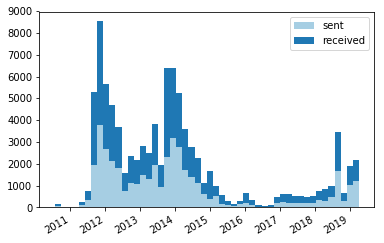

In [69]:
sentCombined = list(dfPeople[dfPeople['direction'] == 'sent']['date'])
receivedCombined = list(dfPeople[dfPeople['direction'] == 'received']['date'])

fig, ax = plt.subplots()
ax.hist([sentCombined, receivedCombined], label=['sent','received'], bins = 50, stacked=True, color=['#a6cee3','#1f78b4'])
fig.autofmt_xdate()
ax.legend()
plt.show()

## plotting messages with an individual only

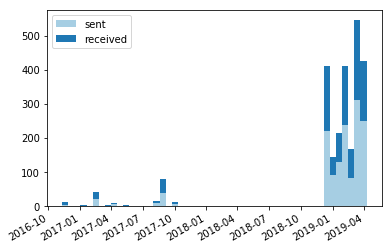

In [74]:
person = 'Adam Wright'

dfPerson = dfPeople.loc[dfPeople['person'] == person].copy()
sent = list(dfPerson[dfPerson['direction'] == 'sent']['date'])
received = list(dfPerson[dfPerson['direction'] == 'received']['date'])

fig, ax = plt.subplots()
ax.hist([sent, received], label=['sent','received'], bins = 50, stacked=True, color=['#a6cee3','#1f78b4'])
fig.autofmt_xdate()
ax.legend()
plt.show()

## tree map

In [47]:
#using dict
# totalmessages = {}
# people = []
# messages = []
# for person in dataDict:
#     totalmessages[person] = len(dataDict[person])
#     people.append(person)
#     messages.append(len(dataDict[person]))
    
# messages, people = zip(*sorted(zip(messages, people)))

In [60]:
#using df
totalMessages = {}
people = []
messages = []

for person in dfFacebook['person'].unique():
    dfTemp = dfFacebook.loc[dfFacebook['person'] == person]
    totalMessages[person] = dfTemp.shape[0]
    people.append(person)
    messages.append(dfTemp.shape[0])
    
messages, people = zip(*sorted(zip(messages, people)))

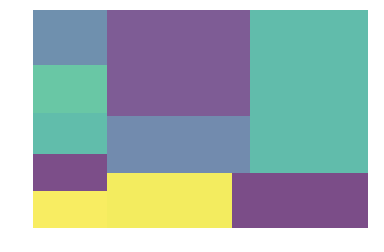

In [64]:
import squarify
squarify.plot(sizes=messages[-10:], 
              #label=people[-10:], 
              alpha=.7 )
plt.axis('off')
plt.show()